# Visualization Lab

[Seaborn](https://seaborn.pydata.org/) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [data-to-viz](https://www.data-to-viz.com/) one can find main principles, techniques and caveats for meaningful data visualization

#### Learning objectives
 By the end of this notebook you will know:
+ How to visualize the relationship of two variables in a plot
+ How to use basic functions in seaborn
+ How to read these plots
---

#### The Dataset

Wrapping up the different variables from climate change sources such as emissions, energy use and national policies, we could therefore combine them to visualize indications of correlation among them. 

In order to compare such measurements, they need to be aggregated, in this case at a country level, therefore the **level of analysis** is country.

**Note:** *Different types of level of analysis could be: year, subregion or continent.*

#### Descriptions

- **Country_ISO:** Country three letters ISO official code **[ZWE = Zimbabwe]**
- **Country:** Name of the country **[Zimbabwe = ZWE]**
- **Laws_Policy:** Total number of laws/policies by country **[min 1 policy/law]**
- **Year_Last_Amendment:** Average year on which the laws/policies were amended **[min 1989, max 2019]**
- **Agriculture:** Average number of times Agriculture is mentioned in the laws/policies **[min 0.0 total]**
- **Energy:** Average number of times Energy is mentioned in the laws/policies **[min 0.0 total]**
- **Emergency_Sentiment:** Average emergency sentiment of the laws/policies **[-1: less urgent, 0: neutral, 1: more urgent]**
- **CO2_Emissions:** Average CO2 emissions in metric tons per capita from 2000 onwards **[min 0.0 M/T pC]**
- **Renewable_Electricity:** Average renewable electricity output in % of total electricity per country from 2000 onwards **[min 0%, max 100%]**

In [34]:
# Import pandas first
import pandas as pd
# load the dataset
df = pd.read_excel('../data/Climate_data_countries.xls')
df.head() # first 5 observations
df.describe() # descriptive statistics

,Laws_Policy,Year_Last_Amendment,Agriculture,Energy,Emergency_Sentiment,CO2_Emissions,Renewable_Electricity
count,198.000000,198.000000,198.000000,198.000000,198.000000,192.000000,194.000000
mean,10.606061,2010.531268,0.168002,3.355718,-0.058462,4.573557,31.084112
std,7.939899,3.373060,0.233348,1.980285,0.252736,6.215308,32.774729
min,1.000000,1989.000000,0.000000,0.000000,-0.777800,0.031363,0.000000
25%,5.000000,2009.333333,0.000000,2.000000,-0.235316,0.672358,1.399104
50%,8.000000,2010.895722,0.093842,3.015625,-0.053516,2.293479,17.063595
75%,14.750000,2012.553571,0.246324,4.371795,0.103415,6.395598,56.074231
max,46.000000,2019.000000,1.333333,10.000000,1.000000,49.423253,100.000000


## **1. Boxplots**:
Boxplots are useful for seeing distribution, central value, and variability. The ends of the box show upper and lower quartiles. The line going through the box shows the median value and the **CO_Emissions** from each upper and lower quartile to the maximum and the minimum. The maximum is calculated by the following formula _(Q3 + 1.5*IQR)_. The minimum is gotten by _(Q1-1.5*IQR)_. Whatever falls outside the boxes are considered outliers. Fortunately, we don’t have to do any of the calculations- whew! Seaborn to the rescue!

c:\users\p70069673\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='CO2_Emissions'>

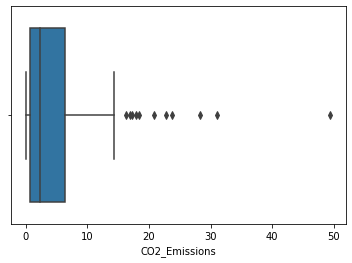

In [40]:
# import seaborn package
import seaborn as sns
sns.boxplot(df['CO2_Emissions'])

## **2. Histogram:**

<AxesSubplot:xlabel='CO2_Emissions'>

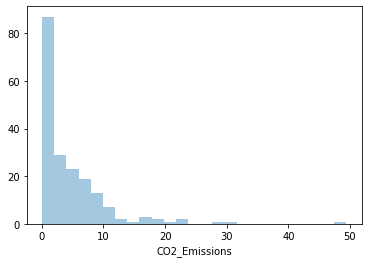

In [46]:
# Plot the histogram thanks to the distplot function
sns.distplot( a=df["CO2_Emissions"], hist=True, kde=False, rug=False)

## **3. Scatterplot**:
A scatterplot displays the relationship between 2 numeric variables. For each data point, the value of its first variable is represented on the X axis, the second on the Y axis.  
Several tools allow scatterplots in Python, such as `Matplotlib`, `Seaborn` and `Plotly`, normally it is used a combination of the three.

### What for
A scatterplot is made to study the relationship between 2 variables. Thus it is often accompanied by a correlation coefficient calculation, that usually tries to measure the `linear relationship`.  

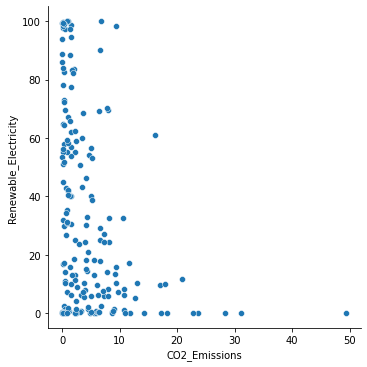

In [25]:
# Create a visualization
sns.relplot(
    data=df,
    x="CO2_Emissions", y="Renewable_Electricity")

<AxesSubplot:xlabel='CO2_Emissions', ylabel='Renewable_Electricity'>

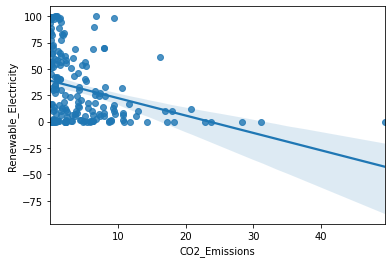

In [26]:
# use the function regplot to make a scatterplot
sns.regplot(x = df['CO2_Emissions'], y = df['Renewable_Electricity'])

#### Variation

Interactivity is a real plus for scatterplot. It allows to zoom on a specific part of the graphic to detect more precise pattern. It also allows to hover dots to get more information about them, like below:

https://plotly.com/python-api-reference/generated/plotly.express.scatter.html

In [18]:
!pip install plotly #if you don't have installed plotly, please first run this command

In [27]:
import plotly.express as px
px.scatter(df, x='CO2_Emissions', y='Renewable_Electricity', trendline="ols")

#### Overplotting

https://www.python-graph-gallery.com/134-how-to-avoid-overplotting-with-python

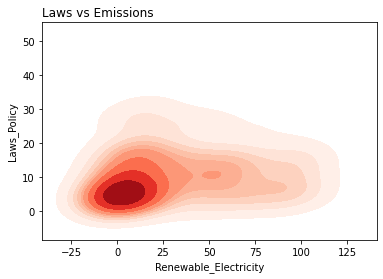

In [17]:
# libraries
import matplotlib.pyplot as plt
import seaborn as sns
 
# 2D density plot:
sns.kdeplot(data = df, x='Renewable_Electricity', y='Laws_Policy', cmap="Reds", shade=True)
plt.title('Laws vs Emissions', loc='left')
plt.show()

## **2. Heatmap**:
A heatmap is a graphical representation of data where each value of a matrix is represented as a color

### What for

Heatmap is really useful to display a general view of numerical data, not to extract specific data point. 

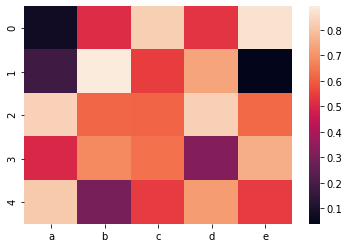

In [5]:
import numpy as np

# Create a dataset
dummy_data = pd.DataFrame(np.random.random((5,5)), columns=["a","b","c","d","e"])

# Default heatmap
sns.heatmap(dummy_data)

### Variation

- For static heatmap, a common practice is to display the exact value of each cell in numbers. Indeed, it is hard to translate a color in a precise number.
- Heatmaps can also be used for time series where there is a regular pattern in time.
- Heatmaps can be applied to adjacency matrix.

### Normalization

https://www.python-graph-gallery.com/94-use-normalization-on-seaborn-heatmap

In [6]:
df_numeric = df._get_numeric_data()

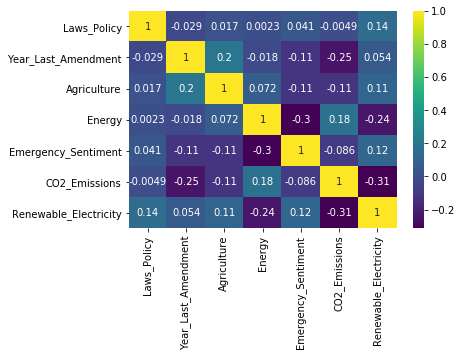

In [7]:
import matplotlib.pyplot as plt

correlation_matix = df_numeric.corr()

sns.heatmap(correlation_matix, annot = True, cmap='viridis')

plt.show()

## **3. Correlogram**
A correlogram is a type of correlation matrix that allows to analyse the relationship between each pair of numeric variables of a matrix. 

The relationship between each pair of variable is visualised through a scatterplot.

The diagonal represents the distribution of each variable with a histogram or a density plot.  

#### What for

Correlogram are really handy for exploratory analysis. It allows to visualize the relationships of the whole dataset in a glimpse. For instance, the linear relationship between petal length and petal width is obvious here, as the one concerning sepal.  

When you get a multivariate dataset, building a correlogram is one of the first step you should follow.

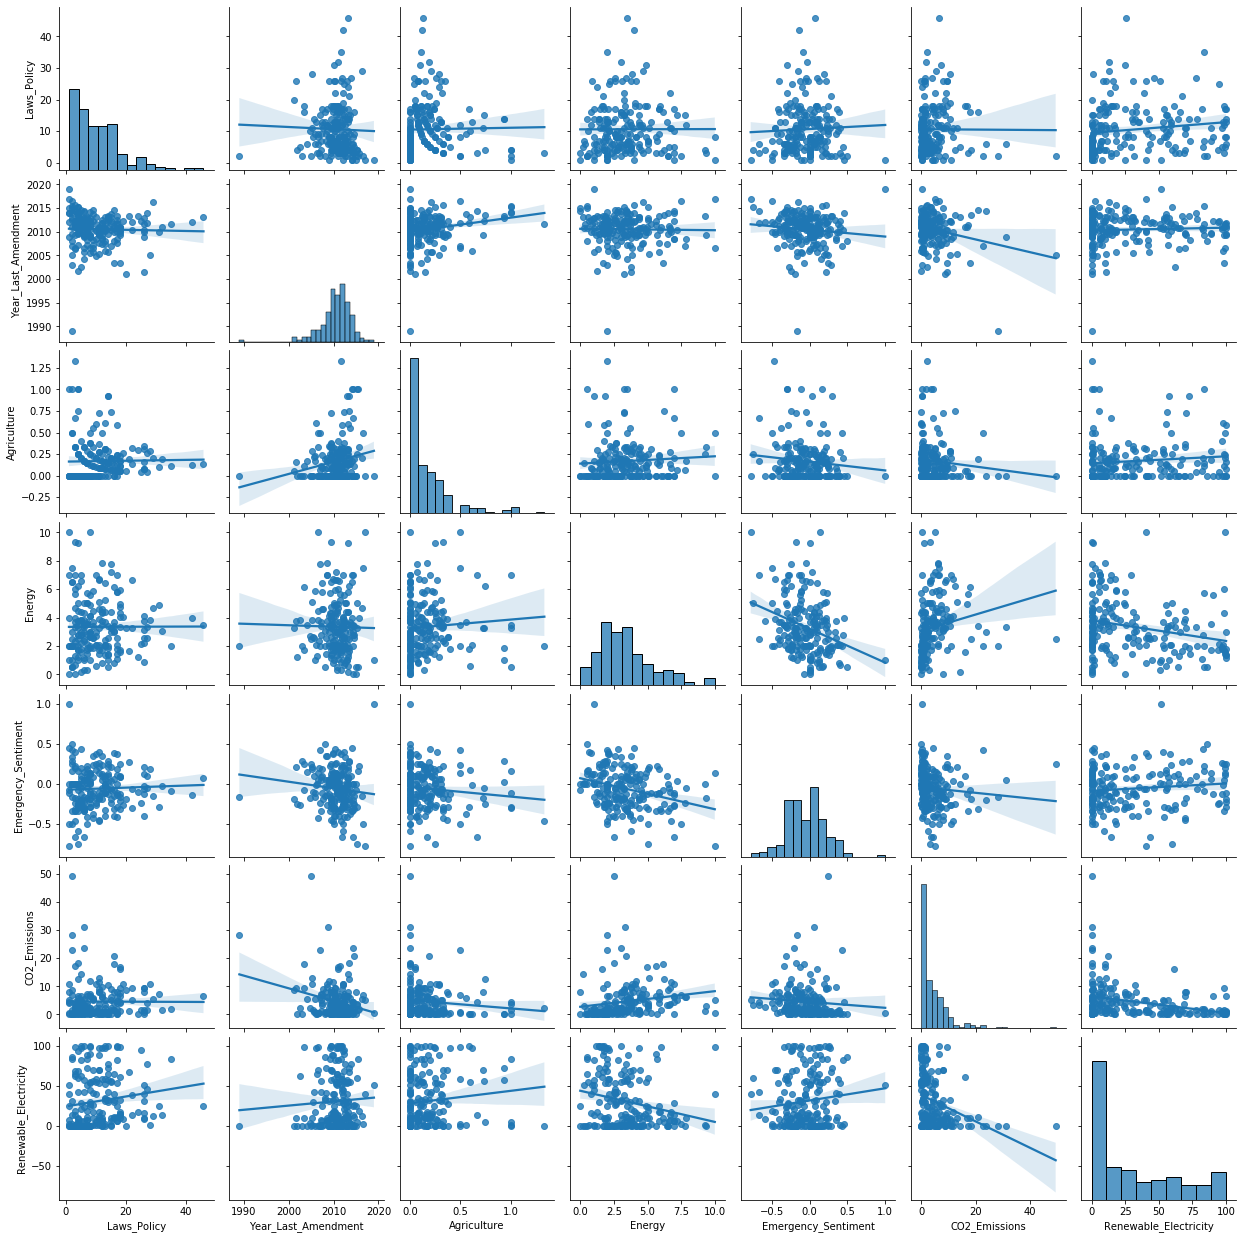

In [8]:
import seaborn as sns
 
# Basic correlogram
sns_plot = sns.pairplot(df_numeric, kind='reg')

#### Variation

All the variations described in the scatterplot section are also available for correlogram. For example, why not applying a linear regression to each pair of variable:

**Note:** Displaying the relationship between more than ~10 variables makes the plot very hard to read

https://www.python-graph-gallery.com/correlogram/

In [53]:
fig = px.scatter_matrix(df,
    dimensions=["Renewable_Electricity","CO2_Emissions", "Laws_Policy", "Energy"],
    color="Emergency_Sentiment",hover_name="Country")
fig.show()

---
<i style="color:red">EXERCISES</i>

+ _1. 
Differences in doing scatter with seaborn and plotly
___

+ _2. 
Theoretical
___

+ _3. 

Using the hover to identify countries
___


+ _4. 


___
